Esse notebook é apenas para realização de testes, desconsidere o uso do mesmo para geração das imagens. 

In [ ]:
from Cloud2DImageConverter import data

In [ ]:
from Cloud2DImageConverter import spherical_projection as sp
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
point_cloud = data.load_data("../point_clouds/semantic_kitti")

In [ ]:
unlabaled, labaled = sp.spherical_projection(point_cloud[0])
labaled = sp.colored_matrix_with_label(labaled)

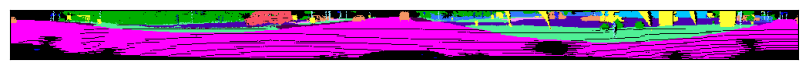

In [ ]:
fig, ax = plt.subplots(figsize=(1024/100, 64/100), dpi=100)
ax.imshow(labaled, extent=[0, 1024, 0, 64])
ax.axis('scaled') 
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

(1024, 64)


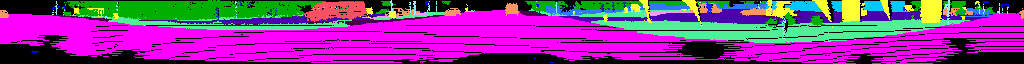

In [ ]:
from PIL import Image

img = Image.fromarray(labaled)
print(img.size)
img.save("teste.png")
img.show()